In [1]:
import numpy as np
import sklearn

While ordinary least squares regression is a good way to fit a linear model onto a dataset, it relies on the fact that the dataset's features are each independent, i.e. uncorrelated. When many of the dataset features are linearly correlated, e.g. if a dataset has multiple features depicting the same price in different currencies, it makes the least squares regression model highly sensitive to noise in the data.

Because real life data tends to have noise, and will often have some linearly correlated features in the dataset, we combat this by performing regularization. For ordinary least squares regression, the goal is to find the weights (coefficients) for the linear model that minimize the sum of squared residuals:
# &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &sum;( x<sub>i</sub> * &#969; - y<sub>i</sub>)<super>2</super>
summation of whole square of (xi multiply by w minus yi)

where each xi represents a data observation and yi is the corresponding label.

And summation is from i=[1,n]

For regularization, the goal is to not only minimize the sum of squared residuals, but to do this with coefficients as small as possible. The smaller the coefficients, the less susceptible they are to random noise in the data. The most commonly used form of regularization is ridge regularization.

With ridge regularization, the goal is now to find the weights that minimize the following quantity:
# &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &#945;||&#969;||<super>2</super><sub>2</sub> + &sum;( x<sub>i</sub> * &#969; - y<sub>i</sub>)<super>2</super>
where α is a non-negative real number hyperparameter and ||w||2 represents the L2 norm of the weights. The additional

And summation is from i=[1,n]
# &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &#945;||&#969;||<super>2</super><sub>2</sub>
is referred to as the penalty term, since it penalizes larger weight values. Larger quantities of α will put greater emphasis on the penalty term, forcing the model to have even smaller weight values.

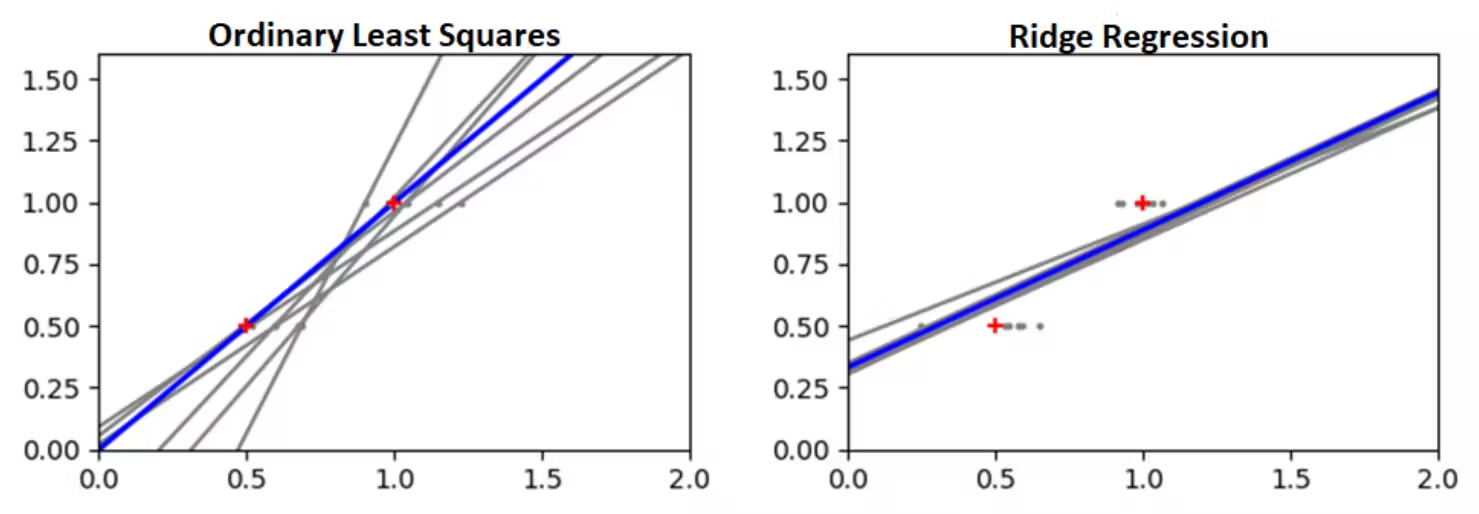

The plot above shows an example of ordinary least squares regression models vs. ridge regression models. The two red crosses mark the points (0.5, 0.5) and (1, 1), and the blue lines are the regression lines for those two points. Each of the grey lines are the regression lines for the original points with added noise (which is signified by the grey points).

The ordinary least squares regression is much more susceptible to being influenced by the added noise, as there is a much larger degree of variance in the grey regression lines compared to the ridge regression.

# B. Choosing the best alpha
In scikit-learn, we implement ridge regression in essentially the same way we implement ordinary least squares regression. We use the Ridge object (part of the linear_model module) to implement ridge regression.

The code below fits a Ridge object on the pizza dataset from the previous chapter.#

In [2]:
pizza_data = np.array([[2100,  800],
                       [2500,  850],
                       [1800,  760],
                       [2000,  800],
                       [2300,  810]])
pizza_prices = np.array([10.99, 12.5 ,  9.99, 10.99, 11.99])

from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.1)
reg.fit(pizza_data, pizza_prices)
print('Coefficients: {}\n'.format(repr(reg.coef_)))
print('Intercept: {}\n'.format(reg.intercept_))
r2 = reg.score(pizza_data, pizza_prices)
print('R2: {}\n'.format(r2))

Coefficients: array([0.00330919, 0.0023288 ])

Intercept: 2.337978289647138

R2: 0.9758349388362841



We can specify the value of the α hyperparameter when initializing the Ridge object (the default is 1.0). However, rather than manually choosing a value, we can use cross-validation to help us choose the optimal α from a list of values.

We'll discuss the specifics of cross-validation in the chapters Cross-Validation, Applying CV to Decision Trees, and Exhaustive Tuning, but for now just know that we can implement a cross-validated ridge regression using the RidgeCV object.

In [3]:
from sklearn import linear_model
alphas = [0.1, 0.2, 0.3]
reg = linear_model.RidgeCV(alphas=alphas)
reg.fit(pizza_data, pizza_prices)
print('Coefficients: {}\n'.format(repr(reg.coef_)))
print('Intercept: {}\n'.format(reg.intercept_))
print('Chosen alpha: {}\n'.format(reg.alpha_))

Coefficients: array([0.00330932, 0.00232767])

Intercept: 2.338616853386645

Chosen alpha: 0.3

